<a href="https://colab.research.google.com/github/fweberling/Variational_Inference/blob/main/factorizedVarationalApproximateDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import gamma
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Likelihood function 

Conjugate prior distributions

Normal distribution

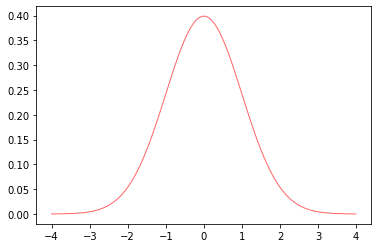

In [ ]:
fig, ax = plt.subplots(1, 1)

mu_data = np.linspace(-4, 4, 100)

# Parameters of conjugate prior distribution on mean
mu_0 = 0
lmbda_0 = 1
tau = 1

conjugate_prior_on_mean = norm.pdf(mu_data, loc = mu_0, scale = 1 / np.sqrt(lmbda_0 * tau))

ax.plot(mu_data, conjugate_prior_on_mean ,'r-', lw=1, alpha=0.6, label='norm pdf')

In [ ]:
# Parameters of conjugate prior distribution on precision
a_0 = 1.99 # shape parameter
b_0 = 1 # rate parameter


tau_data = np.linspace(0, 4, 100)

conjugate_prior_on_precision = gamma.pdf(tau_data, a_0, scale = 1 / b_0)

ax.plot(tau_data, conjugate_prior_on_precision ,'r-', lw=1, alpha=0.6, label='gamma pdf')


In [ ]:
x

array([-2.32634787e+00, -2.25976971e+00, -2.19319154e+00, -2.12661337e+00,
       -2.06003520e+00, -1.99345703e+00, -1.92687886e+00, -1.86030070e+00,
       -1.79372253e+00, -1.72714436e+00, -1.66056619e+00, -1.59398802e+00,
       -1.52740985e+00, -1.46083169e+00, -1.39425352e+00, -1.32767535e+00,
       -1.26109718e+00, -1.19451901e+00, -1.12794084e+00, -1.06136268e+00,
       -9.94784507e-01, -9.28206338e-01, -8.61628170e-01, -7.95050002e-01,
       -7.28471833e-01, -6.61893665e-01, -5.95315497e-01, -5.28737328e-01,
       -4.62159160e-01, -3.95580992e-01, -3.29002823e-01, -2.62424655e-01,
       -1.95846486e-01, -1.29268318e-01, -6.26901497e-02,  3.88801867e-03,
        7.04661870e-02,  1.37044355e-01,  2.03622524e-01,  2.70200692e-01,
        3.36778860e-01,  4.03357029e-01,  4.69935197e-01,  5.36513366e-01,
        6.03091534e-01,  6.69669702e-01,  7.36247871e-01,  8.02826039e-01,
        8.69404207e-01,  9.35982376e-01,  1.00256054e+00,  1.06913871e+00,
        1.13571688e+00,  

True Posterior Distribution

$p \left( \mu, \tau \rvert \mathcal{D} \right) = \mathcal{N}\left(\mu \rvert m, \left(\tau \lambda\right)^{-1} \right) \mathrm{Gam} \left(\tau \rvert \alpha, \beta \right)$ with $\lambda = N + \lambda_0 $ and $ m = \frac{N \bar{x}+ \lambda_0 \mu_0}{\lambda}$ and $\alpha = a_0 + \frac{N}{2} $ and $\beta = b_0 + \frac{1}{2} \left( \sum_{i=1}^{N} \left(x_i - \bar{x} \right)^2 + \frac{N \lambda_0 \left( \bar{x} - \mu_0 \right)^2}{\lambda} \right)$

In [48]:
x_data = np.linspace(-1, 1, 10)
mu_data = np.linspace(-1, 1, 100)
tau_data = np.linspace(0.001, 2, 100)
N = len(x_data)
x_mean = 1/N * np.sum(x_data, axis = 0)
lmbda_0 = 1
a_0 = 2
b_0 = 0.5
lmbda = N + lmbda_0
mu_0 = 0

# Parameters of the true posterior
m = (N * x_mean + lmbda_0 * mu_0) / lmbda
alpha = a_0 + N/2
beta = b_0 + 1/2 * (np.sum(x_data - x_mean, axis = 0)**2 + (N * lmbda_0 * (x_mean - mu_0)**2) / lmbda)

mu_Data, tau_Data = np.meshgrid(mu_data, tau_data)
pos = np.dstack((mu_Data, tau_Data))

true_posterior = norm.pdf(pos[:,:,0], loc = m, scale = 1 / np.sqrt(lmbda * pos[:,:,1])) * gamma.pdf(pos[:,:,1], alpha, scale = 1 / beta) #

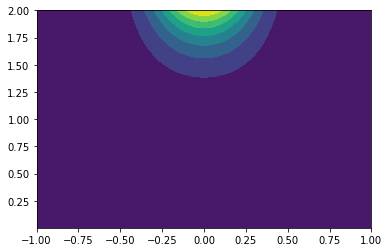

In [49]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(mu_Data, tau_Data, true_posterior)

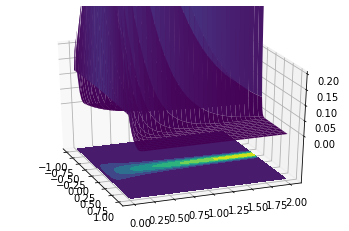

In [10]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(mu_Data, tau_Data, true_posterior, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(mu_Data, tau_Data, true_posterior, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [23]:
true_posterior.shape

(100, 100)